https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/

**Stacking Ensemble:**

La generalización apilada o "stacking" para abreviar es un algoritmo de aprendizaje automático conjunto.

Implica combinar las predicciones de múltiples modelos de aprendizaje automático en el mismo conjunto de datos, como bagging y boosting.

El stacking responde a la pregunta:

Dados múltiples modelos de aprendizaje automático que son hábiles en un problema, pero de diferentes maneras, ¿cómo elige qué modelo usar (confianza)?
El enfoque de esta pregunta es usar otro modelo de aprendizaje automático que aprenda cuándo usar o confiar en cada modelo del conjunto.

A diferencia del bagging, en el stacking, los modelos suelen ser diferentes (p. ej., no todos los árboles de decisión) y se ajustan al mismo conjunto de datos (p. ej., en lugar de muestras del conjunto de datos de entrenamiento).

A diferencia del boosting, en el stacking, se usa un solo modelo para aprender cómo combinar mejor las predicciones de los modelos contribuyentes (por ejemplo, en lugar de una secuencia de modelos que corrigen las predicciones de modelos anteriores).

La arquitectura de un modelo de stacking implica dos o más modelos base, a menudo denominados modelos de nivel 0, y un metamodelo que combina las predicciones de los modelos base, denominado modelo de nivel 1.

Modelos de nivel 0 (modelos base): modelos que se ajustan a los datos de entrenamiento y cuyas predicciones se compilan.

Modelo de nivel 1 (metamodelo): modelo que aprende a combinar mejor las predicciones de los modelos base.

El metamodelo se entrena en las predicciones realizadas por los modelos base sobre datos fuera de la muestra. Es decir, los datos que no se usan para entrenar los modelos base se alimentan a los modelos base, se realizan predicciones y estas predicciones, junto con los resultados esperados, proporcionan los pares de entrada y salida del conjunto de datos de entrenamiento que se usa para ajustar el metamodelo.

Los resultados de los modelos base utilizados como entrada para el metamodelo pueden ser valores reales en el caso de la regresión y valores de probabilidad, valores similares a la probabilidad o etiquetas de clase en el caso de la clasificación.

El enfoque más común para preparar el conjunto de datos de entrenamiento para el metamodelo es a través de la validación cruzada de k-fold de los modelos base, donde las predicciones fuera del pliegue se utilizan como base para el conjunto de datos de entrenamiento para el metamodelo.

Los datos de entrenamiento para el metamodelo también pueden incluir las entradas a los modelos base, p. elementos de entrada de los datos de entrenamiento. Esto puede proporcionar un contexto adicional al metamodelo sobre cómo combinar mejor las predicciones del metamodelo.

Una vez que el conjunto de datos de entrenamiento está preparado para el metamodelo, el metamodelo se puede entrenar de forma aislada en este conjunto de datos y los modelos base se pueden entrenar en todo el conjunto de datos de entrenamiento original.

El stacking es apropiado cuando varios modelos diferentes de aprendizaje automático tienen habilidad en un conjunto de datos, pero tienen habilidad de diferentes maneras. Otra forma de decir esto es que las predicciones hechas por los modelos o los errores en las predicciones hechas por los modelos no están correlacionados o tienen una correlación baja.

Los modelos base suelen ser complejos y diversos. Como tal, a menudo es una buena idea usar una variedad de modelos que hacen suposiciones muy diferentes sobre cómo resolver la tarea de modelado predictivo, como modelos lineales, árboles de decisión, máquinas de vectores de soporte, redes neuronales y más. También se pueden usar otros algoritmos de conjunto como modelos base, como bosques aleatorios.

Modelos base: use una amplia gama de modelos que hacen diferentes suposiciones sobre la tarea de predicción.
El metamodelo suele ser simple y proporciona una interpretación fluida de las predicciones realizadas por los modelos base. Como tal, los modelos lineales a menudo se usan como metamodelo, como la regresión lineal para tareas de regresión (predecir un valor numérico) y la regresión logística para tareas de clasificación (predecir una etiqueta de clase). Aunque esto es común, no es obligatorio.

Metamodelo de regresión: regresión lineal.

Meta-Modelo de Clasificación: Regresión Logística.

El uso de un modelo lineal simple como metamodelo a menudo le da al stacking el nombre coloquial de "mezcla". Al igual que en la predicción, es un promedio ponderado o una combinación de las predicciones realizadas por los modelos base.

El súper alumno puede considerarse un tipo especializado de stacking.

El stacking está diseñado para mejorar el rendimiento del modelado, aunque no se garantiza que resulte en una mejora en todos los casos.

Lograr una mejora en el rendimiento depende de la complejidad del problema y de si está lo suficientemente bien representado por los datos de entrenamiento y lo suficientemente complejo como para que haya más que aprender al combinar las predicciones. También depende de la elección de los modelos base y de si son lo suficientemente hábiles y no correlacionados en sus predicciones (o errores).

Si un modelo base funciona igual o mejor que el stacking ensemble, se debe usar el modelo base en su lugar, dada su menor complejidad (por ejemplo, es más simple de describir, entrenar y mantener).

**Stacking para clasificación:**

En esta sección, veremos el uso del stacking para un problema de clasificación.

Primero, podemos usar la función make_classification() para crear un problema de clasificación binaria sintética con 1000 ejemplos y 20 características de entrada.

El ejemplo completo se muestra a continuación.

In [ ]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


A continuación, podemos evaluar un conjunto de diferentes modelos de aprendizaje automático en el conjunto de datos.

Específicamente, evaluaremos los siguientes cinco algoritmos:

Regresión logística.

k-Vecinos más cercanos.

Árbol de decisión.

Máquinas de vectores soporte.

Naive Bayes.

Cada algoritmo se evaluará utilizando los hiperparámetros del modelo predeterminado. La función get_models() a continuación crea los modelos que deseamos evaluar.

In [ ]:
# get a list of models to evaluate
def get_models():
	models = dict()
	models['lr'] = LogisticRegression()
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()
	return models

Cada modelo se evaluará utilizando una validación cruzada repetida de k-fold.

La función evaluar_modelo () a continuación toma una instancia de modelo y devuelve una lista de puntajes de tres repeticiones de validación cruzada estratificada de 10 veces.

In [ ]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

Luego podemos informar el rendimiento medio de cada algoritmo y también crear un diagrama de caja y bigotes para comparar la distribución de las puntuaciones de precisión para cada algoritmo.

Uniendo esto, el ejemplo completo se enumera a continuación.

>lr 0.866 (0.029)
>knn 0.931 (0.025)
>cart 0.822 (0.043)
>svm 0.957 (0.020)
>bayes 0.833 (0.031)


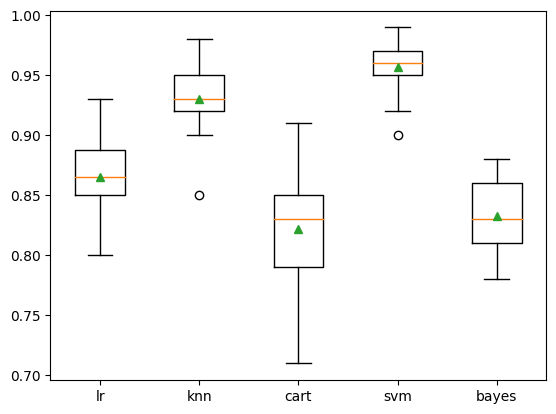

In [ ]:
# compare standalone models for binary classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	models['lr'] = LogisticRegression()
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Ejecutar el ejemplo primero informa la precisión de la desviación media y estándar para cada modelo.

**Nota:** Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o las diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y compare el resultado promedio.

Podemos ver que, en este caso, SVM funciona mejor con una precisión media de alrededor del 95,7 por ciento.

A continuación, se crea un gráfico de caja y bigotes que compara las puntuaciones de precisión de la distribución para cada modelo, lo que nos permite ver claramente que KNN y SVM funcionan mejor en promedio que LR, CART y Bayes.

Aquí tenemos cinco algoritmos diferentes que funcionan bien, presumiblemente de diferentes maneras en este conjunto de datos.

A continuación, podemos intentar combinar estos cinco modelos en un solo modelo de conjunto mediante el stacking.

Podemos usar un modelo de regresión logística para aprender cómo combinar mejor las predicciones de cada uno de los cinco modelos separados.

La siguiente función get_stacking() define el modelo StackingClassifier definiendo primero una lista de tuplas para los cinco modelos base y luego definiendo el metamodelo de regresión logística para combinar las predicciones de los modelos base mediante una validación cruzada de 5 veces.

In [ ]:
# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('lr', LogisticRegression()))
	level0.append(('knn', KNeighborsClassifier()))
	level0.append(('cart', DecisionTreeClassifier()))
	level0.append(('svm', SVC()))
	level0.append(('bayes', GaussianNB()))
	# define meta learner model
	level1 = LogisticRegression()
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model

Podemos incluir el stacking ensemble en la lista de modelos para evaluar, junto con los modelos independientes.

In [ ]:
# get a list of models to evaluate
def get_models():
	models = dict()
	models['lr'] = LogisticRegression()
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()
	models['stacking'] = get_stacking()
	return models

Nuestra expectativa es que el stacking ensemble funcione mejor que cualquier modelo base único.

Este no es siempre el caso y, si no es así, entonces se debe usar el modelo base en favor del modelo de conjunto.

El ejemplo completo de evaluación del modelo de stacking ensemble junto con los modelos independientes se enumera a continuación.

>lr 0.866 (0.029)
>knn 0.931 (0.025)
>cart 0.822 (0.044)
>svm 0.957 (0.020)
>bayes 0.833 (0.031)
>stacking 0.964 (0.020)


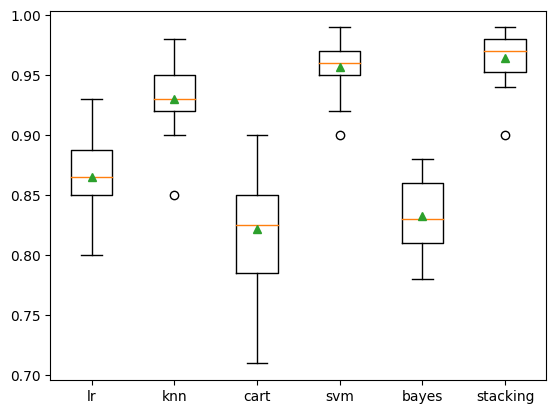

In [ ]:
# compare ensemble to each baseline classifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
	return X, y

# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('lr', LogisticRegression()))
	level0.append(('knn', KNeighborsClassifier()))
	level0.append(('cart', DecisionTreeClassifier()))
	level0.append(('svm', SVC()))
	level0.append(('bayes', GaussianNB()))
	# define meta learner model
	level1 = LogisticRegression()
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model

# get a list of models to evaluate
def get_models():
	models = dict()
	models['lr'] = LogisticRegression()
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()
	models['stacking'] = get_stacking()
	return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Ejecutar el ejemplo primero informa el rendimiento de cada modelo. Esto incluye el desempeño de cada modelo base, luego el stacking ensemble.

**Nota:** Nuestros resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o las diferencias en la precisión numérica. Consideremos ejecutar el ejemplo varias veces y comparemos el resultado promedio.

En este caso, podemos ver que el stacking ensemble parece funcionar mejor que cualquier modelo único en promedio, logrando una precisión de alrededor del 96,4 por ciento.

Se crea un diagrama de caja que muestra la distribución de las precisiones de clasificación del modelo.

Aquí, podemos ver que la precisión media y mediana para el modelo de stacking se encuentra ligeramente más alta que el modelo SVM.

Si elegimos un stacking ensemble como nuestro modelo final, podemos ajustarlo y usarlo para hacer predicciones sobre nuevos datos como cualquier otro modelo.

Primero, el stacking ensemble se ajusta a todos los datos disponibles, luego se puede llamar a la función predict() para hacer predicciones sobre nuevos datos.

El siguiente ejemplo demuestra esto en nuestro conjunto de datos de clasificación binaria.

In [ ]:
# make a prediction with a stacking ensemble
from sklearn.datasets import make_classification
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# define the base models
level0 = list()
level0.append(('lr', LogisticRegression()))
level0.append(('knn', KNeighborsClassifier()))
level0.append(('cart', DecisionTreeClassifier()))
level0.append(('svm', SVC()))
level0.append(('bayes', GaussianNB()))
# define meta learner model
level1 = LogisticRegression()
# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
# fit the model on all available data
model.fit(X, y)
# make a prediction for one example
data = [[2.47475454,0.40165523,1.68081787,2.88940715,0.91704519,-3.07950644,4.39961206,0.72464273,-4.86563631,-6.06338084,-1.22209949,-0.4699618,1.01222748,-0.6899355,-0.53000581,6.86966784,-3.27211075,-6.59044146,-2.21290585,-3.139579]]
yhat = model.predict(data)
print('Predicted Class: %d' % (yhat))

Predicted Class: 0


Ejecutar el ejemplo ajusta el modelo de stacking ensemble en todo el conjunto de datos y luego se usa para hacer una predicción en una nueva fila de datos, como lo haríamos cuando usamos el modelo en una aplicación.

**Stacking para regresión:**

En esta sección, veremos el uso del stacking para un problema de regresión.

Primero, podemos usar la función make_regression() para crear un problema de regresión sintética con 1000 ejemplos y 20 características de entrada.

El ejemplo completo se muestra a continuación.

# conjunto de datos de regresión de prueba
desde sklearn.datasets import make_regression
# definir conjunto de datos
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1)
# resumir el conjunto de datos
imprimir (forma X, forma Y)
Ejecutar el ejemplo crea el conjunto de datos y resume la forma de los componentes de entrada y salida.

(1000, 20) (1000,)
A continuación, podemos evaluar un conjunto de diferentes modelos de aprendizaje automático en el conjunto de datos.

En concreto, evaluaremos los siguientes tres algoritmos:

k-Vecinos más cercanos.

Árbol de decisión.

Soporte de regresión vectorial.

**Nota:** El conjunto de datos de prueba se puede resolver de manera trivial usando un modelo de regresión lineal, ya que el conjunto de datos se creó usando un modelo lineal oculto. Como tal, dejaremos este modelo fuera del ejemplo para que podamos demostrar el beneficio del método de stacking ensemble.

Cada algoritmo se evaluará utilizando los hiperparámetros del modelo predeterminado. La función get_models() a continuación crea los modelos que deseamos evaluar.

In [ ]:
# get a list of models to evaluate
def get_models():
	models = dict()
	models['knn'] = KNeighborsRegressor()
	models['cart'] = DecisionTreeRegressor()
	models['svm'] = SVR()
	return models

Cada modelo se evaluará utilizando una validación cruzada repetida de k-fold. La función evaluar_modelo () a continuación toma una instancia de modelo y devuelve una lista de puntajes de tres repeticiones de validación cruzada de 10 veces

In [ ]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
	return scores

Luego podemos informar el rendimiento medio de cada algoritmo y también crear un diagrama de caja y bigotes para comparar la distribución de las puntuaciones de precisión para cada algoritmo.

En este caso, el rendimiento del modelo se informará utilizando el error absoluto medio (MAE). La biblioteca scikit-learn invierte el signo de este error para maximizarlo, de -infinito a 0 para obtener la mejor puntuación.

Uniendo esto, el ejemplo completo se enumera a continuación.

>knn -101.019 (7.161)
>cart -147.326 (9.798)
>svm -162.419 (12.565)


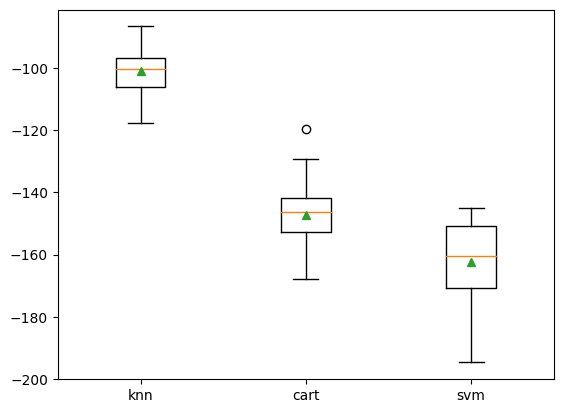

In [ ]:
# compare machine learning models for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	models['knn'] = KNeighborsRegressor()
	models['cart'] = DecisionTreeRegressor()
	models['svm'] = SVR()
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Ejecutar el ejemplo primero informa la media y la desviación estándar MAE para cada modelo.

Nota: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o las diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y compare el resultado promedio.

Podemos ver que en este caso, KNN funciona mejor con un MAE medio negativo de alrededor de -100.

A continuación, se crea un diagrama de caja y bigotes que compara las puntuaciones MAE negativas de distribución para cada modelo.

Aquí tenemos tres algoritmos diferentes que funcionan bien, presumiblemente de diferentes maneras en este conjunto de datos.

A continuación, podemos intentar combinar estos tres modelos en un solo modelo de conjunto mediante el stacking.

Podemos usar un modelo de regresión lineal para aprender cómo combinar mejor las predicciones de cada uno de los tres modelos separados.

La función get_stacking() a continuación define el modelo StackingRegressor definiendo primero una lista de tuplas para los tres modelos base y luego definiendo el metamodelo de regresión lineal para combinar las predicciones de los modelos base usando una validación cruzada de 5 veces

In [ ]:
# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('knn', KNeighborsRegressor()))
	level0.append(('cart', DecisionTreeRegressor()))
	level0.append(('svm', SVR()))
	# define meta learner model
	level1 = LinearRegression()
	# define the stacking ensemble
	model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
	return model

Podemos incluir el stacking ensemble en la lista de modelos para evaluar, junto con los modelos independientes.

In [ ]:
# get a list of models to evaluate
def get_models():
	models = dict()
	models['knn'] = KNeighborsRegressor()
	models['cart'] = DecisionTreeRegressor()
	models['svm'] = SVR()
	models['stacking'] = get_stacking()
	return models

Nuestra expectativa es que el stacking ensemble funcione mejor que cualquier modelo base único.

Este no es siempre el caso, y si no es el caso, entonces el modelo base debe usarse a favor del modelo de conjunto.

El ejemplo completo de evaluación del modelo de stacking ensemble junto con los modelos independientes se enumera a continuación.

>knn -101.019 (7.161)
>cart -149.184 (10.557)
>svm -162.419 (12.565)
>stacking -56.680 (5.251)


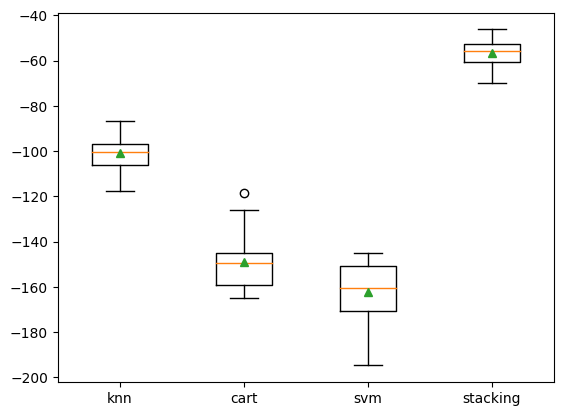

In [ ]:
# compare ensemble to each standalone models for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1)
	return X, y

# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('knn', KNeighborsRegressor()))
	level0.append(('cart', DecisionTreeRegressor()))
	level0.append(('svm', SVR()))
	# define meta learner model
	level1 = LinearRegression()
	# define the stacking ensemble
	model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
	return model

# get a list of models to evaluate
def get_models():
	models = dict()
	models['knn'] = KNeighborsRegressor()
	models['cart'] = DecisionTreeRegressor()
	models['svm'] = SVR()
	models['stacking'] = get_stacking()
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Ejecutar el ejemplo primero informa el rendimiento de cada modelo. Esto incluye el desempeño de cada modelo base, luego el stacking ensemble.

Nota: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o las diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y compare el resultado promedio.

En este caso, podemos ver que el stacking ensemble parece funcionar mejor que cualquier modelo individual en promedio, logrando un MAE medio negativo de alrededor de -56.

Se crea un diagrama de caja que muestra la distribución de las puntuaciones de error del modelo. Aquí, podemos ver que las puntuaciones media y mediana para el modelo de stacking son mucho más altas que las de cualquier modelo individual.

Si elegimos un stacking ensemble como nuestro modelo final, podemos ajustarlo y usarlo para hacer predicciones sobre nuevos datos como cualquier otro modelo.

Primero, el stacking ensemble se ajusta a todos los datos disponibles, luego se puede llamar a la función predict() para hacer predicciones sobre nuevos datos.

El siguiente ejemplo demuestra esto en nuestro conjunto de datos de regresión.

In [ ]:
# make a prediction with a stacking ensemble
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1)
# define the base models
level0 = list()
level0.append(('knn', KNeighborsRegressor()))
level0.append(('cart', DecisionTreeRegressor()))
level0.append(('svm', SVR()))
# define meta learner model
level1 = LinearRegression()
# define the stacking ensemble
model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
# fit the model on all available data
model.fit(X, y)
# make a prediction for one example
data = [[0.59332206,-0.56637507,1.34808718,-0.57054047,-0.72480487,1.05648449,0.77744852,0.07361796,0.88398267,2.02843157,1.01902732,0.11227799,0.94218853,0.26741783,0.91458143,-0.72759572,1.08842814,-0.61450942,-0.69387293,1.69169009]]
yhat = model.predict(data)
print('Predicted Value: %.3f' % (yhat))

Predicted Value: 557.723


Ejecutar el ejemplo ajusta el modelo de stacking ensemble en todo el conjunto de datos y luego se usa para hacer una predicción en una nueva fila de datos, como lo haríamos cuando usamos el modelo en una aplicación.